In [140]:
import pandas as pd

In [141]:
df = pd.read_csv('sample_data.txt',delimiter=' ')

In [142]:
df.head()

,オーダー№,測定投入日,測定投入時間,測定完了日,測定完了時間,測定機№,Unnamed: 6
0,10FRE103S0,20200628,742,20200628,1108,LH26,NaN
1,10G1E20200,20200628,19,20200628,1834,LH25,NaN
2,10FVE20400,20200628,646,20200628,1855,LH12,NaN
3,10FSE104S0,20200628,1119,20200628,2058,LH26,NaN
4,10FFFA0300,20200628,1048,20200629,427,LH02,NaN


In [143]:
# 不要な列を削除
#df.drop('Unnamed: 6',axis=1)
del df['Unnamed: 6']
df.head()

,オーダー№,測定投入日,測定投入時間,測定完了日,測定完了時間,測定機№
0,10FRE103S0,20200628,742,20200628,1108,LH26
1,10G1E20200,20200628,19,20200628,1834,LH25
2,10FVE20400,20200628,646,20200628,1855,LH12
3,10FSE104S0,20200628,1119,20200628,2058,LH26
4,10FFFA0300,20200628,1048,20200629,427,LH02


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
オーダー№     56 non-null object
測定投入日     56 non-null int64
測定投入時間    56 non-null int64
測定完了日     56 non-null int64
測定完了時間    56 non-null int64
測定機№      56 non-null object
dtypes: int64(4), object(2)
memory usage: 2.7+ KB


In [112]:
def get_startdate(row):
    """
    日時と日付を連結して、日付型に変換
    """
    a = '0000' + str(row['測定投入時間'])
    mydate = row['測定投入日']
    mystr = str(mydate) + a[-4:]
    return pd.to_datetime(mystr,format='%Y%m%d%H%M')

def get_compdate(row):
    a = '0000' + str(row['測定完了時間'])
    mydate = row['測定完了日']
    mystr = str(mydate) + a[-4:]
    return pd.to_datetime(mystr,format='%Y%m%d%H%M')


df['startdate'] = df.apply(get_startdate,axis=1)
df['compdate'] = df.apply(get_compdate,axis=1)
df.head()

,オーダー№,測定投入日,測定投入時間,測定完了日,測定完了時間,測定機№,startdate,compdate
0,10FRE103S0,20200628,742,20200628,1108,LH26,2020-06-28 07:42:00,2020-06-28 11:08:00
1,10G1E20200,20200628,19,20200628,1834,LH25,2020-06-28 00:19:00,2020-06-28 18:34:00
2,10FVE20400,20200628,646,20200628,1855,LH12,2020-06-28 06:46:00,2020-06-28 18:55:00
3,10FSE104S0,20200628,1119,20200628,2058,LH26,2020-06-28 11:19:00,2020-06-28 20:58:00
4,10FFFA0300,20200628,1048,20200629,427,LH02,2020-06-28 10:48:00,2020-06-29 04:27:00


In [82]:
import datetime

In [7]:
#order_no = '10FRE103S0'
#start_date = datetime.datetime(2020,6,29,10,20)
#comp_date = datetime.datetime(2020,7,2,18,30)

In [159]:
def split_datetime(order_no,start_date,comp_date):
    """
    開始日時と終了日時を1日単位で分割する
    
    paramters:
        order_no : str orderno
        start_date: datetime 開始時間
        comp_date : datetime 終了時間
    returns
        lst : list 日毎に分割されたディクショナリ
        [{'オーダー№': '10FVE20100','from_date': datetime.datetime(2020, 6, 28, 21, 18),'to_date': datetime.datetime(2020, 6, 29, 0, 0)},
         {'オーダー№': '10FVE20100','from_date': datetime.datetime(2020, 6, 29, 0, 0),'to_date': datetime.datetime(2020, 6, 29, 12, 29)}]
    """
    # 何日にまたがっているか(1ならその日のうち、2なら2日に渡って)
    range_days = (comp_date.date() - start_date.date()).days +  1
    #print(range_day)
    lst = []
    for i in range(range_days):
        from_date = start_date.replace(hour=0,minute=0) + datetime.timedelta(days=i)
        to_date = start_date.replace(hour=0,minute=0) + datetime.timedelta(days=i + 1)
        if start_date > from_date:
            from_date = start_date
        if comp_date < to_date:
            to_date = comp_date
        lst.append({'オーダー№':order_no,'from_date':from_date,'to_date':to_date})
        #print(from_date,to_date,to_date-from_date)
    return lst

In [114]:
df.head()

,オーダー№,測定投入日,測定投入時間,測定完了日,測定完了時間,測定機№,startdate,compdate
0,10FRE103S0,20200628,742,20200628,1108,LH26,2020-06-28 07:42:00,2020-06-28 11:08:00
1,10G1E20200,20200628,19,20200628,1834,LH25,2020-06-28 00:19:00,2020-06-28 18:34:00
2,10FVE20400,20200628,646,20200628,1855,LH12,2020-06-28 06:46:00,2020-06-28 18:55:00
3,10FSE104S0,20200628,1119,20200628,2058,LH26,2020-06-28 11:19:00,2020-06-28 20:58:00
4,10FFFA0300,20200628,1048,20200629,427,LH02,2020-06-28 10:48:00,2020-06-29 04:27:00


In [160]:
order_no = '10FVE20100'
start_date = datetime.datetime(2020,6,28,10,18)
comp_date = datetime.datetime(2020,6,29,12,29)
split_datetime(order_no,start_date,comp_date)
#(comp_date.date() - start_date.date()).days

[{'オーダー№': '10FVE20100',
  'from_date': datetime.datetime(2020, 6, 28, 10, 18),
  'to_date': datetime.datetime(2020, 6, 29, 0, 0)},
 {'オーダー№': '10FVE20100',
  'from_date': datetime.datetime(2020, 6, 29, 0, 0),
  'to_date': datetime.datetime(2020, 6, 29, 12, 29)}]

In [118]:
# 投入時間を日にちごとに分割したリストを作る
lst =[]
for index, row in df.iterrows():
    order_no, start_date, comp_date = row['オーダー№'],row['startdate'],row['compdate']
    mydic = split_datetime(order_no,start_date,comp_date)
    #print(order_no, start_date, comp_date)
    #print(mydic)
    lst = lst + split_datetime(order_no,start_date,comp_date)
print(lst[:5])

[{'オーダー№': '10FRE103S0', 'from_date': Timestamp('2020-06-28 07:42:00'), 'to_date': Timestamp('2020-06-28 11:08:00')}, {'オーダー№': '10G1E20200', 'from_date': Timestamp('2020-06-28 00:19:00'), 'to_date': Timestamp('2020-06-28 18:34:00')}, {'オーダー№': '10FVE20400', 'from_date': Timestamp('2020-06-28 06:46:00'), 'to_date': Timestamp('2020-06-28 18:55:00')}, {'オーダー№': '10FSE104S0', 'from_date': Timestamp('2020-06-28 11:19:00'), 'to_date': Timestamp('2020-06-28 20:58:00')}, {'オーダー№': '10FFFA0300', 'from_date': Timestamp('2020-06-28 10:48:00'), 'to_date': Timestamp('2020-06-29 00:00:00')}]


In [119]:
df_split = pd.DataFrame(lst)
df_split.head(10)

,from_date,to_date,オーダー№
0,2020-06-28 07:42:00,2020-06-28 11:08:00,10FRE103S0
1,2020-06-28 00:19:00,2020-06-28 18:34:00,10G1E20200
2,2020-06-28 06:46:00,2020-06-28 18:55:00,10FVE20400
3,2020-06-28 11:19:00,2020-06-28 20:58:00,10FSE104S0
4,2020-06-28 10:48:00,2020-06-29 00:00:00,10FFFA0300
5,2020-06-29 00:00:00,2020-06-29 04:27:00,10FFFA0300
6,2020-06-28 21:18:00,2020-06-29 00:00:00,10FVE20100
7,2020-06-29 00:00:00,2020-06-29 12:29:00,10FVE20100
8,2020-06-28 19:18:00,2020-06-29 00:00:00,10FWE20200
9,2020-06-29 00:00:00,2020-06-29 13:38:00,10FWE20200


In [121]:
# もとのデータフレームと日毎に分割したデータフレーをマージする
df2 = pd.merge(df,df_split,on='オーダー№')
df2.head(10)

,オーダー№,測定投入日,測定投入時間,測定完了日,測定完了時間,測定機№,startdate,compdate,from_date,to_date
0,10FRE103S0,20200628,742,20200628,1108,LH26,2020-06-28 07:42:00,2020-06-28 11:08:00,2020-06-28 07:42:00,2020-06-28 11:08:00
1,10G1E20200,20200628,19,20200628,1834,LH25,2020-06-28 00:19:00,2020-06-28 18:34:00,2020-06-28 00:19:00,2020-06-28 18:34:00
2,10FVE20400,20200628,646,20200628,1855,LH12,2020-06-28 06:46:00,2020-06-28 18:55:00,2020-06-28 06:46:00,2020-06-28 18:55:00
3,10FSE104S0,20200628,1119,20200628,2058,LH26,2020-06-28 11:19:00,2020-06-28 20:58:00,2020-06-28 11:19:00,2020-06-28 20:58:00
4,10FFFA0300,20200628,1048,20200629,427,LH02,2020-06-28 10:48:00,2020-06-29 04:27:00,2020-06-28 10:48:00,2020-06-29 00:00:00
5,10FFFA0300,20200628,1048,20200629,427,LH02,2020-06-28 10:48:00,2020-06-29 04:27:00,2020-06-29 00:00:00,2020-06-29 04:27:00
6,10FVE20100,20200628,2118,20200629,1229,LH26,2020-06-28 21:18:00,2020-06-29 12:29:00,2020-06-28 21:18:00,2020-06-29 00:00:00
7,10FVE20100,20200628,2118,20200629,1229,LH26,2020-06-28 21:18:00,2020-06-29 12:29:00,2020-06-29 00:00:00,2020-06-29 12:29:00
8,10FWE20200,20200628,1918,20200629,1338,LH25,2020-06-28 19:18:00,2020-06-29 13:38:00,2020-06-28 19:18:00,2020-06-29 00:00:00
9,10FWE20200,20200628,1918,20200629,1338,LH25,2020-06-28 19:18:00,2020-06-29 13:38:00,2020-06-29 00:00:00,2020-06-29 13:38:00


In [286]:
# 必要な項目だけ取り出す
df3 = df2.loc[:,['オーダー№','測定機№','startdate','compdate','from_date','to_date']]
df3.head()

,オーダー№,測定機№,startdate,compdate,from_date,to_date
0,10FRE103S0,LH26,2020-06-28 07:42:00,2020-06-28 11:08:00,2020-06-28 07:42:00,2020-06-28 11:08:00
1,10G1E20200,LH25,2020-06-28 00:19:00,2020-06-28 18:34:00,2020-06-28 00:19:00,2020-06-28 18:34:00
2,10FVE20400,LH12,2020-06-28 06:46:00,2020-06-28 18:55:00,2020-06-28 06:46:00,2020-06-28 18:55:00
3,10FSE104S0,LH26,2020-06-28 11:19:00,2020-06-28 20:58:00,2020-06-28 11:19:00,2020-06-28 20:58:00
4,10FFFA0300,LH02,2020-06-28 10:48:00,2020-06-29 04:27:00,2020-06-28 10:48:00,2020-06-29 00:00:00


In [132]:
# 利用時間を追加する
df3['use_time'] = df3['to_date']-df3['from_date']
df3.head()

,オーダー№,測定機№,startdate,compdate,from_date,to_date,use_time
0,10FRE103S0,LH26,2020-06-28 07:42:00,2020-06-28 11:08:00,2020-06-28 07:42:00,2020-06-28 11:08:00,03:26:00
1,10G1E20200,LH25,2020-06-28 00:19:00,2020-06-28 18:34:00,2020-06-28 00:19:00,2020-06-28 18:34:00,18:15:00
2,10FVE20400,LH12,2020-06-28 06:46:00,2020-06-28 18:55:00,2020-06-28 06:46:00,2020-06-28 18:55:00,12:09:00
3,10FSE104S0,LH26,2020-06-28 11:19:00,2020-06-28 20:58:00,2020-06-28 11:19:00,2020-06-28 20:58:00,09:39:00
4,10FFFA0300,LH02,2020-06-28 10:48:00,2020-06-29 04:27:00,2020-06-28 10:48:00,2020-06-29 00:00:00,13:12:00


In [161]:
# フィルターの条件を設定
cond = (df3['測定機№']=='LH26') & (datetime.datetime(2020,6,29,0,0) < df3['startdate']) & (df3['startdate']< datetime.datetime(2020,7,7,0,0))

In [162]:
# フィルタをかける
df3[cond]

,オーダー№,測定機№,startdate,compdate,from_date,to_date,use_time
22,10ECC30100,LH26,2020-06-29 13:20:00,2020-06-30 07:00:00,2020-06-29 13:20:00,2020-06-30 00:00:00,10:40:00
23,10ECC30100,LH26,2020-06-29 13:20:00,2020-06-30 07:00:00,2020-06-30 00:00:00,2020-06-30 07:00:00,07:00:00
37,10EBC30400,LH26,2020-06-30 07:30:00,2020-07-01 04:03:00,2020-06-30 07:30:00,2020-07-01 00:00:00,16:30:00
38,10EBC30400,LH26,2020-06-30 07:30:00,2020-07-01 04:03:00,2020-07-01 00:00:00,2020-07-01 04:03:00,04:03:00
69,10EEC30200,LH26,2020-07-03 02:13:00,2020-07-03 21:49:00,2020-07-03 02:13:00,2020-07-03 21:49:00,19:36:00
83,10EDC30100,LH26,2020-07-03 22:11:00,2020-07-04 13:48:00,2020-07-03 22:11:00,2020-07-04 00:00:00,01:49:00
84,10EDC30100,LH26,2020-07-03 22:11:00,2020-07-04 13:48:00,2020-07-04 00:00:00,2020-07-04 13:48:00,13:48:00
101,10EDC30200,LH26,2020-07-04 14:27:00,2020-07-05 10:08:00,2020-07-04 14:27:00,2020-07-05 00:00:00,09:33:00
102,10EDC30200,LH26,2020-07-04 14:27:00,2020-07-05 10:08:00,2020-07-05 00:00:00,2020-07-05 10:08:00,10:08:00


In [163]:
# queryを使って条件をつける
# https://note.nkmk.me/python-pandas-query/
df3.query('startdate < datetime.datetime(2020,6,29,0,0)')

,オーダー№,測定機№,startdate,compdate,from_date,to_date,use_time
0,10FRE103S0,LH26,2020-06-28 07:42:00,2020-06-28 11:08:00,2020-06-28 07:42:00,2020-06-28 11:08:00,0 days 03:26:00
1,10G1E20200,LH25,2020-06-28 00:19:00,2020-06-28 18:34:00,2020-06-28 00:19:00,2020-06-28 18:34:00,0 days 18:15:00
2,10FVE20400,LH12,2020-06-28 06:46:00,2020-06-28 18:55:00,2020-06-28 06:46:00,2020-06-28 18:55:00,0 days 12:09:00
3,10FSE104S0,LH26,2020-06-28 11:19:00,2020-06-28 20:58:00,2020-06-28 11:19:00,2020-06-28 20:58:00,0 days 09:39:00
4,10FFFA0300,LH02,2020-06-28 10:48:00,2020-06-29 04:27:00,2020-06-28 10:48:00,2020-06-29 00:00:00,0 days 13:12:00
5,10FFFA0300,LH02,2020-06-28 10:48:00,2020-06-29 04:27:00,2020-06-29 00:00:00,2020-06-29 04:27:00,0 days 04:27:00
6,10FVE20100,LH26,2020-06-28 21:18:00,2020-06-29 12:29:00,2020-06-28 21:18:00,2020-06-29 00:00:00,0 days 02:42:00
7,10FVE20100,LH26,2020-06-28 21:18:00,2020-06-29 12:29:00,2020-06-29 00:00:00,2020-06-29 12:29:00,0 days 12:29:00
8,10FWE20200,LH25,2020-06-28 19:18:00,2020-06-29 13:38:00,2020-06-28 19:18:00,2020-06-29 00:00:00,0 days 04:42:00
9,10FWE20200,LH25,2020-06-28 19:18:00,2020-06-29 13:38:00,2020-06-29 00:00:00,2020-06-29 13:38:00,0 days 13:38:00


In [43]:
df3.query('測定機№ == "LH26"')

SyntaxError: invalid character in identifier (<unknown>, line 1)

In [164]:
# 列名をアルファベットに
df4 = df3.rename(columns={'測定機№':'MachineNo','オーダー№':'OrderNo'})
df4.head()

,OrderNo,MachineNo,startdate,compdate,from_date,to_date,use_time
0,10FRE103S0,LH26,2020-06-28 07:42:00,2020-06-28 11:08:00,2020-06-28 07:42:00,2020-06-28 11:08:00,03:26:00
1,10G1E20200,LH25,2020-06-28 00:19:00,2020-06-28 18:34:00,2020-06-28 00:19:00,2020-06-28 18:34:00,18:15:00
2,10FVE20400,LH12,2020-06-28 06:46:00,2020-06-28 18:55:00,2020-06-28 06:46:00,2020-06-28 18:55:00,12:09:00
3,10FSE104S0,LH26,2020-06-28 11:19:00,2020-06-28 20:58:00,2020-06-28 11:19:00,2020-06-28 20:58:00,09:39:00
4,10FFFA0300,LH02,2020-06-28 10:48:00,2020-06-29 04:27:00,2020-06-28 10:48:00,2020-06-29 00:00:00,13:12:00


In [165]:
df4.query('MachineNo == "LH26"')

,OrderNo,MachineNo,startdate,compdate,from_date,to_date,use_time
0,10FRE103S0,LH26,2020-06-28 07:42:00,2020-06-28 11:08:00,2020-06-28 07:42:00,2020-06-28 11:08:00,03:26:00
3,10FSE104S0,LH26,2020-06-28 11:19:00,2020-06-28 20:58:00,2020-06-28 11:19:00,2020-06-28 20:58:00,09:39:00
6,10FVE20100,LH26,2020-06-28 21:18:00,2020-06-29 12:29:00,2020-06-28 21:18:00,2020-06-29 00:00:00,02:42:00
7,10FVE20100,LH26,2020-06-28 21:18:00,2020-06-29 12:29:00,2020-06-29 00:00:00,2020-06-29 12:29:00,12:29:00
22,10ECC30100,LH26,2020-06-29 13:20:00,2020-06-30 07:00:00,2020-06-29 13:20:00,2020-06-30 00:00:00,10:40:00
23,10ECC30100,LH26,2020-06-29 13:20:00,2020-06-30 07:00:00,2020-06-30 00:00:00,2020-06-30 07:00:00,07:00:00
37,10EBC30400,LH26,2020-06-30 07:30:00,2020-07-01 04:03:00,2020-06-30 07:30:00,2020-07-01 00:00:00,16:30:00
38,10EBC30400,LH26,2020-06-30 07:30:00,2020-07-01 04:03:00,2020-07-01 00:00:00,2020-07-01 04:03:00,04:03:00
69,10EEC30200,LH26,2020-07-03 02:13:00,2020-07-03 21:49:00,2020-07-03 02:13:00,2020-07-03 21:49:00,19:36:00
83,10EDC30100,LH26,2020-07-03 22:11:00,2020-07-04 13:48:00,2020-07-03 22:11:00,2020-07-04 00:00:00,01:49:00


In [166]:
# 複数条件のクエリ
df4.query('(MachineNo == "LH26") & (datetime.datetime(2020,6,29,0,0) < startdate < datetime.datetime(2020,7,7,0,0) )')

,OrderNo,MachineNo,startdate,compdate,from_date,to_date,use_time
22,10ECC30100,LH26,2020-06-29 13:20:00,2020-06-30 07:00:00,2020-06-29 13:20:00,2020-06-30 00:00:00,10:40:00
23,10ECC30100,LH26,2020-06-29 13:20:00,2020-06-30 07:00:00,2020-06-30 00:00:00,2020-06-30 07:00:00,07:00:00
37,10EBC30400,LH26,2020-06-30 07:30:00,2020-07-01 04:03:00,2020-06-30 07:30:00,2020-07-01 00:00:00,16:30:00
38,10EBC30400,LH26,2020-06-30 07:30:00,2020-07-01 04:03:00,2020-07-01 00:00:00,2020-07-01 04:03:00,04:03:00
69,10EEC30200,LH26,2020-07-03 02:13:00,2020-07-03 21:49:00,2020-07-03 02:13:00,2020-07-03 21:49:00,19:36:00
83,10EDC30100,LH26,2020-07-03 22:11:00,2020-07-04 13:48:00,2020-07-03 22:11:00,2020-07-04 00:00:00,01:49:00
84,10EDC30100,LH26,2020-07-03 22:11:00,2020-07-04 13:48:00,2020-07-04 00:00:00,2020-07-04 13:48:00,13:48:00
101,10EDC30200,LH26,2020-07-04 14:27:00,2020-07-05 10:08:00,2020-07-04 14:27:00,2020-07-05 00:00:00,09:33:00
102,10EDC30200,LH26,2020-07-04 14:27:00,2020-07-05 10:08:00,2020-07-05 00:00:00,2020-07-05 10:08:00,10:08:00


In [167]:
# sumを取る
df4.query('(MachineNo == "LH26") & (datetime.datetime(2020,6,29,0,0) < startdate < datetime.datetime(2020,7,7,0,0) )').sum()

OrderNo      10ECC3010010ECC3010010EBC3040010EBC3040010EEC3...
MachineNo                 LH26LH26LH26LH26LH26LH26LH26LH26LH26
use_time                                       3 days 21:07:00
dtype: object

In [168]:
# sumした結果を辞書にする
dict(df4.query('(MachineNo == "LH26") & (datetime.datetime(2020,6,29,0,0) < startdate < datetime.datetime(2020,7,7,0,0) )').sum())

{'OrderNo': '10ECC3010010ECC3010010EBC3040010EBC3040010EEC3020010EDC3010010EDC3010010EDC3020010EDC30200',
 'MachineNo': 'LH26LH26LH26LH26LH26LH26LH26LH26LH26',
 'use_time': Timedelta('3 days 21:07:00')}

In [170]:
df_LH26 = df4.query('MachineNo == "LH26"')
df_LH26.head()

,OrderNo,MachineNo,startdate,compdate,from_date,to_date,use_time
0,10FRE103S0,LH26,2020-06-28 07:42:00,2020-06-28 11:08:00,2020-06-28 07:42:00,2020-06-28 11:08:00,03:26:00
3,10FSE104S0,LH26,2020-06-28 11:19:00,2020-06-28 20:58:00,2020-06-28 11:19:00,2020-06-28 20:58:00,09:39:00
6,10FVE20100,LH26,2020-06-28 21:18:00,2020-06-29 12:29:00,2020-06-28 21:18:00,2020-06-29 00:00:00,02:42:00
7,10FVE20100,LH26,2020-06-28 21:18:00,2020-06-29 12:29:00,2020-06-29 00:00:00,2020-06-29 12:29:00,12:29:00
22,10ECC30100,LH26,2020-06-29 13:20:00,2020-06-30 07:00:00,2020-06-29 13:20:00,2020-06-30 00:00:00,10:40:00


In [192]:
df_LH26_1 = df_LH26.set_index('from_date')
df_LH26_1.head()

,OrderNo,MachineNo,startdate,compdate,to_date,use_time
from_date,,,,,,
2020-06-28 07:42:00,10FRE103S0,LH26,2020-06-28 07:42:00,2020-06-28 11:08:00,2020-06-28 11:08:00,03:26:00
2020-06-28 11:19:00,10FSE104S0,LH26,2020-06-28 11:19:00,2020-06-28 20:58:00,2020-06-28 20:58:00,09:39:00
2020-06-28 21:18:00,10FVE20100,LH26,2020-06-28 21:18:00,2020-06-29 12:29:00,2020-06-29 00:00:00,02:42:00
2020-06-29 00:00:00,10FVE20100,LH26,2020-06-28 21:18:00,2020-06-29 12:29:00,2020-06-29 12:29:00,12:29:00
2020-06-29 13:20:00,10ECC30100,LH26,2020-06-29 13:20:00,2020-06-30 07:00:00,2020-06-30 00:00:00,10:40:00


In [193]:
df_LH26_2=df_LH26_1.resample('D').sum()

In [194]:
df_LH26_2['operating_ratio']=df_LH26_2['use_time']/datetime.timedelta(days=1)
df_LH26_2

,OrderNo,MachineNo,use_time,operating_ratio
from_date,,,,
2020-06-28,10FRE103S010FSE104S010FVE20100,LH26LH26LH26,15:47:00,0.657639
2020-06-29,10FVE2010010ECC30100,LH26LH26,23:09:00,0.964583
2020-06-30,10ECC3010010EBC30400,LH26LH26,23:30:00,0.979167
2020-07-01,10EBC30400,LH26,04:03:00,0.168750
2020-07-02,False,False,00:00:00,0.000000
2020-07-03,10EEC3020010EDC30100,LH26LH26,21:25:00,0.892361
2020-07-04,10EDC3010010EDC30200,LH26LH26,23:21:00,0.972917
2020-07-05,10EDC30200,LH26,10:08:00,0.422222


In [198]:
df_LH26_2.resample('M').mean()

,operating_ratio
from_date,
2020-06-30,0.86713
2020-07-31,0.49125


In [200]:
a=df4['MachineNo']

In [204]:
a.drop_duplicates()

0      LH26
1      LH25
2      LH12
4      LH02
12     LH45
14     LH62
16     LM07
24     LT82
28     LT79
30     LH07
34     LH04
49     LH03
58     LH47
78     LH08
85     LH31
105    LH33
Name: MachineNo, dtype: object

In [265]:
df_sum = pd.DataFrame()
for machine in df4['MachineNo'].drop_duplicates():
    #print(machine)
    df_by_machine = df4.query('MachineNo == @machine').set_index('from_date').drop(['OrderNo','MachineNo'],axis=1)
    df_by_date = df_by_machine.resample('D').sum()
    df_by_date['MachineNo'] = machine
    df_sum = df_sum.append(df_by_date)
    #print(df_by_date.head())

df_sum['operating_ratio']=df_sum['use_time']/datetime.timedelta(days=1)
df_sum.head()

,use_time,MachineNo,operating_ratio
from_date,,,
2020-06-28,15:47:00,LH26,0.657639
2020-06-29,23:09:00,LH26,0.964583
2020-06-30,23:30:00,LH26,0.979167
2020-07-01,04:03:00,LH26,0.168750
2020-07-02,00:00:00,LH26,0.000000


C:\Users\seko\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


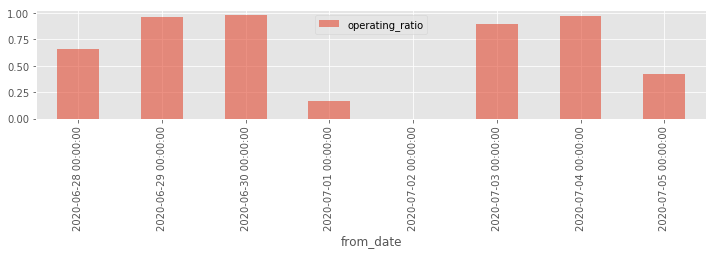

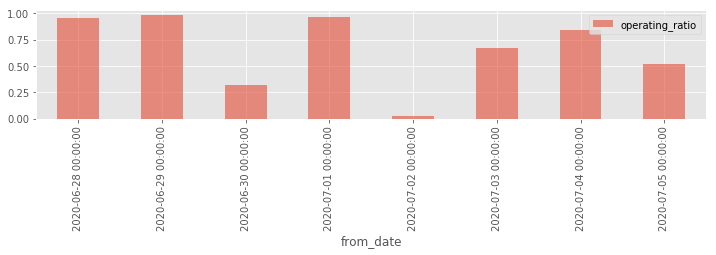

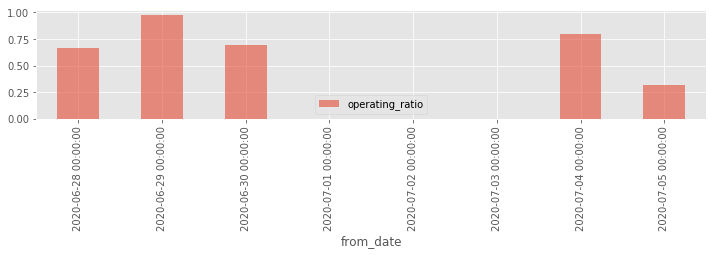

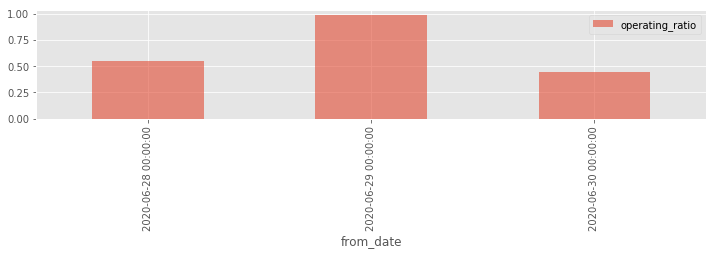

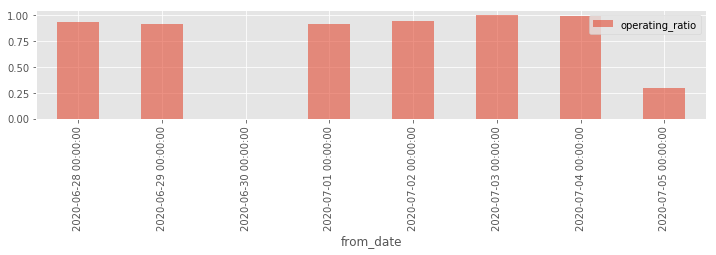

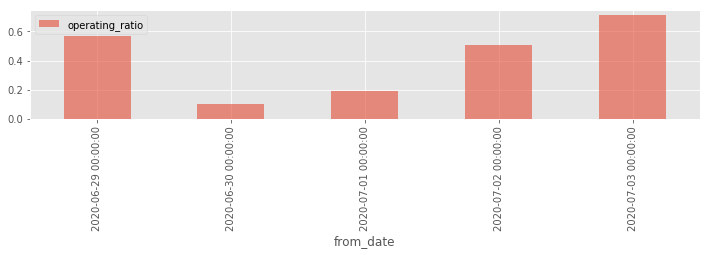

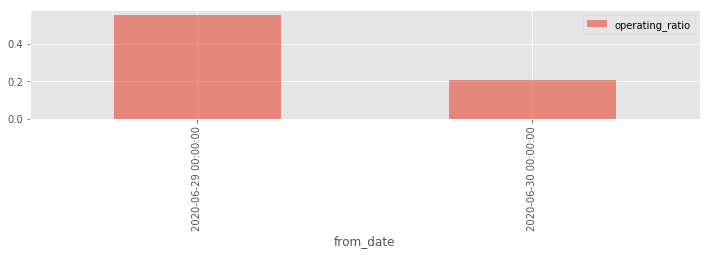

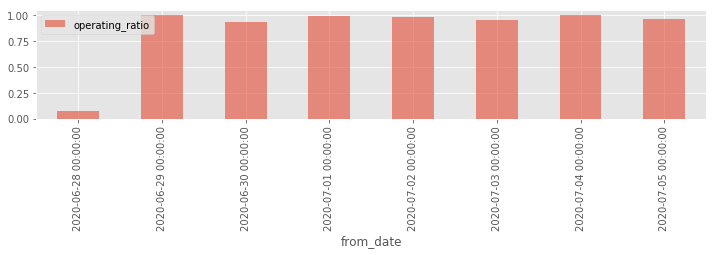

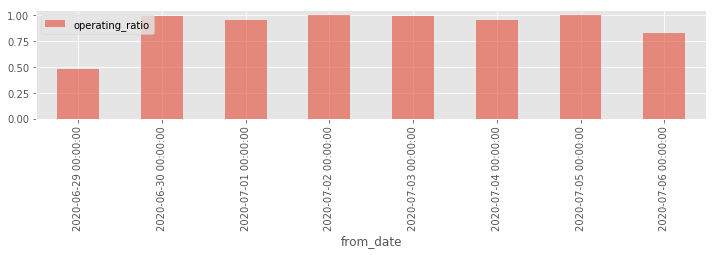

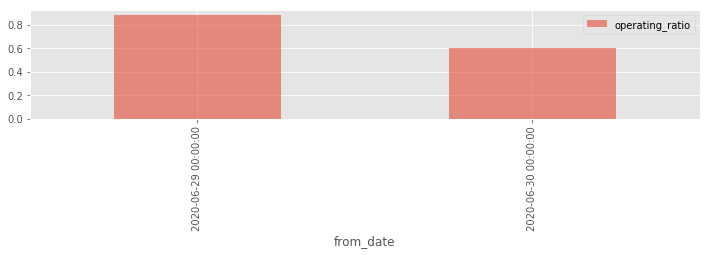

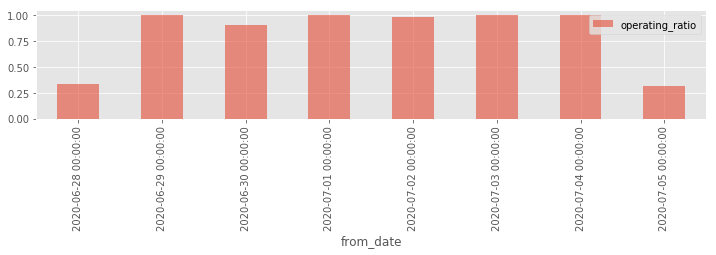

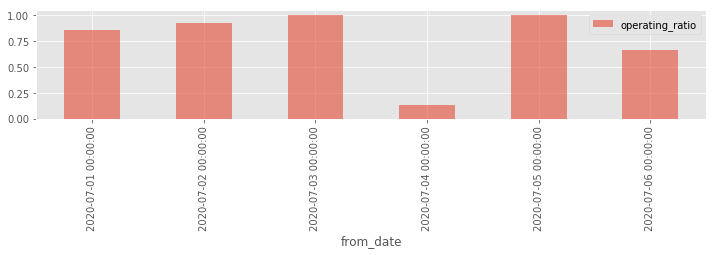

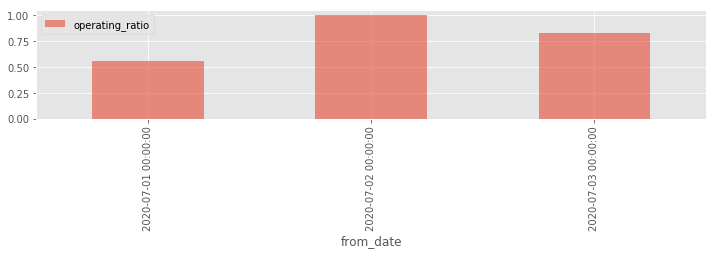

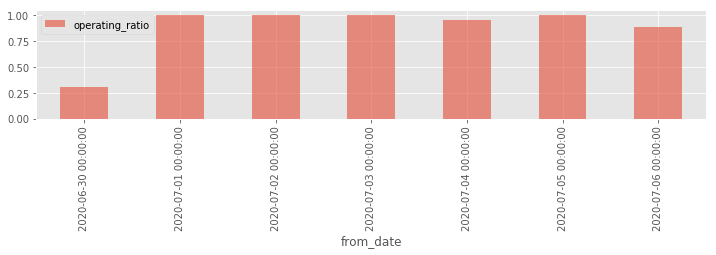

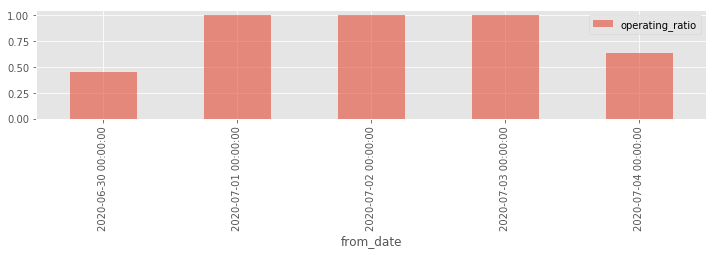

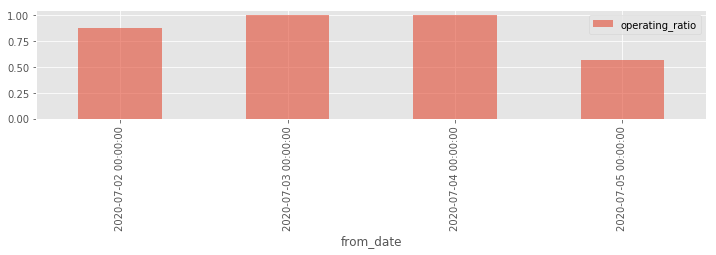

In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)
for machine in df_sum['MachineNo'].drop_duplicates():
    df_sum.query('MachineNo == @machine').plot.bar(y=['operating_ratio'], alpha=0.6, figsize=(12,2))